###  Image Classification of Geographical Features using MobileNetV2

### Description: Developed a deep learning model utilizing MobileNetV2 to classify images into four geographical categories: cloudy, desert, green area, and water. Achieved feature extraction and transfer learning to enhance model accuracy, resulting in a structured pipeline for image preprocessing, model training, and evaluation.

### Import required libraries and modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential,layers,applications
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Collect image path for each cotton disease category

In [2]:
cloudy=glob('cloudy/*.jpg')
desert=glob('desert/*.jpg')
green_area=glob('green_area/*.jpg')
water=glob('water/*.jpg')

### Define classes and corresponding labels

In [3]:
classes={0:'cloudy', 1:'desert', 2:'green_area', 3:'water'}

### Load and Label images for Each Category

In [4]:
images= []
labels= []

for i in cloudy:
    img= plt.imread(i)
    images.append(img)
    labels.append(0)

for i in desert:
    img= plt.imread(i)
    images.append(img)
    labels.append(1)

for i in green_area:
    img= plt.imread(i)
    images.append(img)
    labels.append(2)

for i in water:
    img= plt.imread(i)
    images.append(img)
    labels.append(3)

### Plot first few images

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6924\3339966811.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


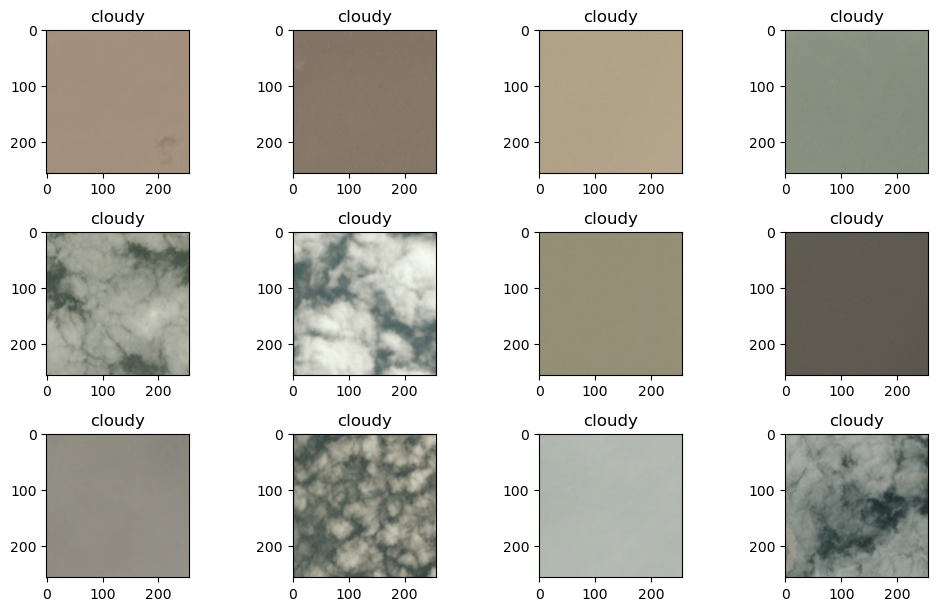

In [5]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
    plt.tight_layout()

### Shuffle The Images

In [6]:
images,labels= shuffle(images,labels)

### Plot some of the images after the shuffle

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6924\3339966811.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


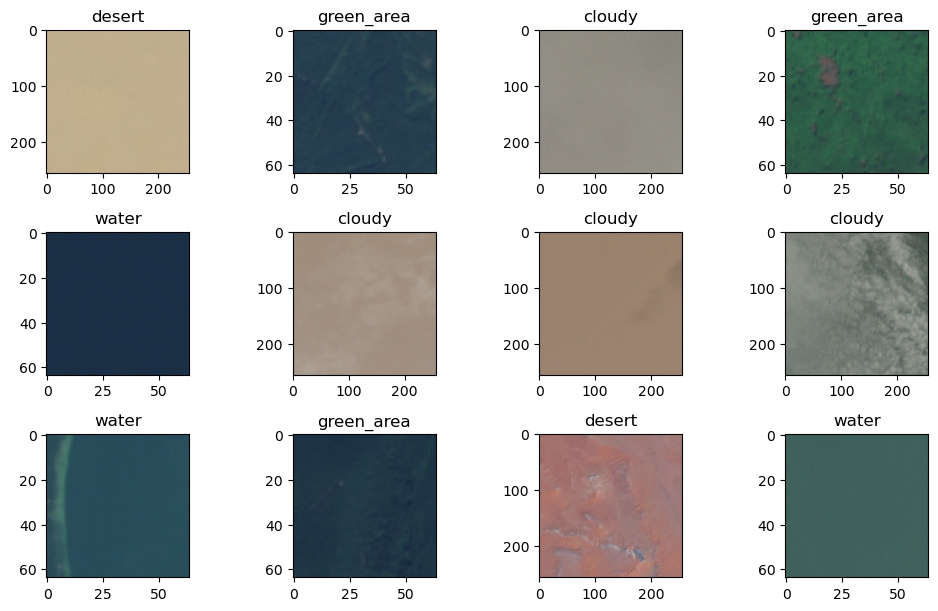

In [7]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
    plt.tight_layout()

### Resize the images to MobileNetV2 input shape (320,320,3)

In [8]:
X= []
 
for i in images:
    X.append(resize(i,(320,320,3)))

### Plot some of the images after resizing

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6924\3535901554.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


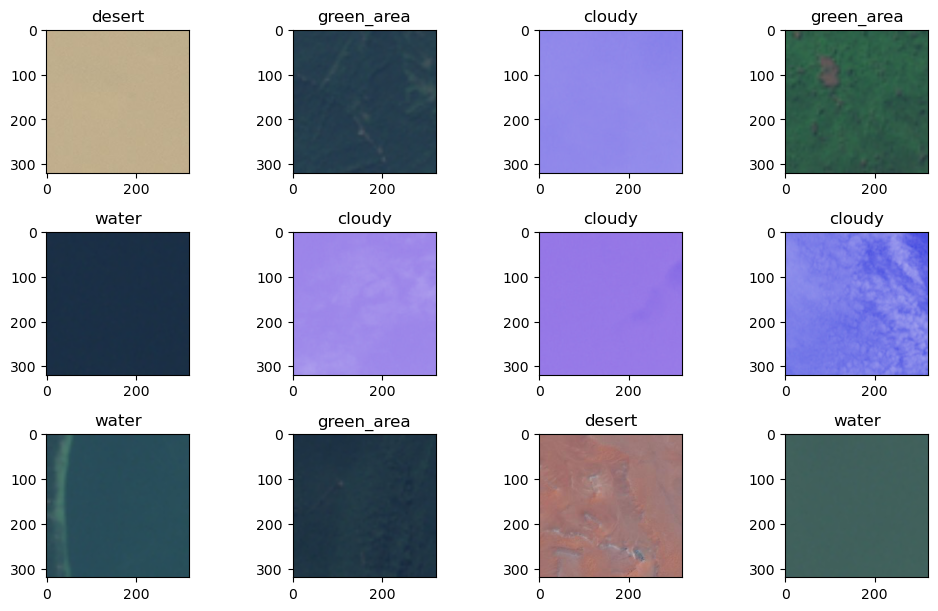

In [9]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
    plt.tight_layout()

### Convert image and label datatypes from list to Numpy array

In [10]:
X= np.array(X)
y=np.array(labels)

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=100)

### Instantiate MobileNetV2

In [12]:
from keras.applications import MobileNetV2

In [14]:
mobilenet_v2 = MobileNetV2(
    input_shape=(320, 320, 3),
    include_top=False,
    weights='imagenet',
    classes=4,
    classifier_activation='softmax'
)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6924\3773661843.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_v2 = MobileNetV2(


In [15]:
mobilenet_v2.trainable = False

### Build Transfer learning model using MobileNetV2 feature extractor

In [17]:
model= Sequential([
    mobilenet_v2,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation='relu'),
    layers.Dense(,activation='softmax')
])

### Compile Transfer Learning Models

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the model  

In [20]:
model.fit(X_train,y_train, epochs=10, validation_split=0.05)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3705 - loss: 1.2868 - val_accuracy: 0.7895 - val_loss: 0.6193
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7520 - loss: 0.6439 - val_accuracy: 1.0000 - val_loss: 0.3025
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9658 - loss: 0.3182 - val_accuracy: 1.0000 - val_loss: 0.0961
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9690 - loss: 0.1654 - val_accuracy: 1.0000 - val_loss: 0.0489
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9836 - loss: 0.1204 - val_accuracy: 1.0000 - val_loss: 0.0294
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9978 - loss: 0.0588 - val_accuracy: 1.0000 - val_loss: 0.0179
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9983 - loss: 0.0539 - val_accuracy: 1.0000 - val_loss: 0.0129
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9925 - loss: 0.0392 - val_accuracy: 1.0000 - val_loss:

### Model Prediction on Test Data

In [21]:
y_pred= model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step


In [22]:
y_pred=[np.argmax(i) for i in y_pred]

In [23]:
y_test=[np.argmax(i) for i in y_test]

### Calculate Accuracy Score

In [24]:
accuracy_score(y_pred,y_test)

0.2857142857142857

### Confusion Matrix

<Axes: >

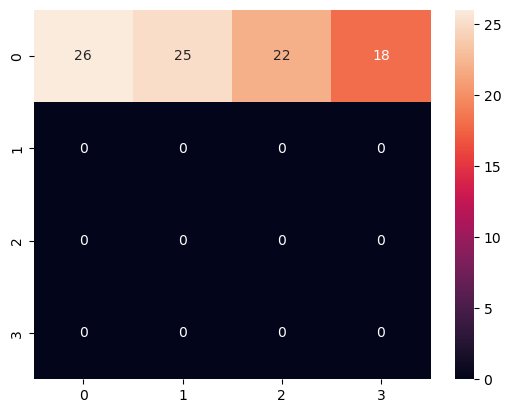

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

### Classification Report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44        91
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.29        91
   macro avg       0.25      0.07      0.11        91
weighted avg       1.00      0.29      0.44        91



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
